In [ ]:
import pySim_lib as pysim
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import cKDTree

plt.rcParams.update({"text.usetex": True})

a = 268
n = 26
colors = ["royalblue", "MediumOrchid", "mediumseagreen"]
#load particles
all_nbody_positions = []
all_lpt_positions = []
all_emu_positions = []
all_nbody_velocities = []
all_lpt_velocities = []
all_emu_velocities = []
for i in range(1,n):
    lpt_filename = f"L400-N128_set1_2lpt_run06{i:02}"
    nbody_filename = f"L400-N128_set1_nbody_run06{i:02}"
    emu_filename = f"L400-N128_set1_emu_run06{i:02}"
    # Load the simulation data
    nbody_particles=np.loadtxt(f'/Users/CHermann/Desktop/MPE/Bachelor_thesis/Sparkling/input/nbody_input/{nbody_filename}.dat')
    lpt_particles=np.loadtxt(f'/Users/CHermann/Desktop/MPE/Bachelor_thesis/Sparkling/input/2lpt_input/{lpt_filename}.dat')
    emu_particles=np.loadtxt(f'/Users/CHermann/Desktop/MPE/Bachelor_thesis/Sparkling/input/emu_sims/{emu_filename}.dat')
    # Extract the positions of the particles
    nbody_positions = nbody_particles[:, 0:3]
    lpt_positions = lpt_particles[:, 0:3]
    emu_positions = emu_particles[:, 0:3]
    # Extract the velocities of the particles
    nbody_velocities = nbody_particles[:, 3:6]
    lpt_velocities = lpt_particles[:, 3:6]
    emu_velocities = emu_particles[:, 3:6]
    #collect all the positions and velocities
    all_nbody_positions.append(nbody_positions)
    all_lpt_positions.append(lpt_positions)
    all_emu_positions.append(emu_positions)
    all_nbody_velocities.append(nbody_velocities)
    all_lpt_velocities.append(lpt_velocities)
    all_emu_velocities.append(emu_velocities)
all_nbody_positions = np.array(all_nbody_positions)
print(all_nbody_positions.shape)
all_lpt_positions = np.array(all_lpt_positions)
all_emu_positions = np.array(all_emu_positions)
all_nbody_velocities = np.array(all_nbody_velocities)
all_lpt_velocities = np.array(all_lpt_velocities)
all_emu_velocities = np.array(all_emu_velocities)

#fine, but not too effective, maybe more loops? NO, I should save the data in a better format

(4, 2097152, 3)


In [ ]:
N_particles = len(nbody_particles) #all lengths should be the same
print("N_particles = ", N_particles)
V_box = a**3
n_m = N_particles / V_box
print("n_mean =", n_m)
r_min = (V_box / N_particles)**(1/3) * 2.5
print("r_min = ", r_min) #also same for each simulation



all_nbody_voids_incl_small = []
all_lpt_voids_incl_small = []
all_emu_voids_incl_small = []
all_nbody_voids = []
all_lpt_voids = []
all_emu_voids = []

#load voids
for i in range(1,n):
    lpt_filename = f"L400-N128_set1_2lpt_run06{i:02}"
    nbody_filename = f"L400-N128_set1_nbody_run06{i:02}"
    emu_filename = f"L400-N128_set1_emu_run06{i:02}"
    nbody_void_data_incl_small = np.loadtxt(f'/Users/CHermann/Desktop/MPE/Bachelor_thesis/Sparkling/output/nbody_output/void_{nbody_filename}.dat')
    lpt_void_data_incl_small = np.loadtxt(f'/Users/CHermann/Desktop/MPE/Bachelor_thesis/Sparkling/output/2lpt_output/void_{lpt_filename}.dat')
    emu_void_data_incl_small = np.loadtxt(f'/Users/CHermann/Desktop/MPE/Bachelor_thesis/Sparkling/output/emu_output/void_{emu_filename}.dat')
    all_nbody_voids_incl_small.append(nbody_void_data_incl_small)
    all_lpt_voids_incl_small.append(lpt_void_data_incl_small)
    all_emu_voids_incl_small.append(emu_void_data_incl_small)

    #filter nbody voids
    nbody_radii_incl_small = nbody_void_data_incl_small[:, 0] 
    nbody_coords_incl_small = nbody_void_data_incl_small[:, 1:4]
    nbody_allowed = nbody_radii_incl_small > r_min  
    nbody_radii = nbody_radii_incl_small[nbody_allowed]
    nbody_coords = nbody_coords_incl_small[nbody_allowed]
    nbody_void_data = np.column_stack((nbody_radii, nbody_coords))
    all_nbody_voids.append(nbody_void_data)
    #filter 2lpt voids
    lpt_radii_incl_small = lpt_void_data_incl_small[:, 0]
    lpt_coords_incl_small = lpt_void_data_incl_small[:, 1:4]
    lpt_allowed = lpt_radii_incl_small > r_min
    lpt_radii = lpt_radii_incl_small[lpt_allowed]
    lpt_coords = lpt_coords_incl_small[lpt_allowed]
    lpt_void_data = np.column_stack((lpt_radii, lpt_coords))
    all_lpt_voids.append(lpt_void_data)
    #filter emu voids
    emu_radii_incl_small = emu_void_data_incl_small[:, 0]
    emu_coords_incl_small = emu_void_data_incl_small[:, 1:4]
    emu_allowed = emu_radii_incl_small > r_min
    emu_radii = emu_radii_incl_small[emu_allowed]
    emu_coords = emu_coords_incl_small[emu_allowed]
    emu_void_data = np.column_stack((emu_radii, emu_coords))
    all_emu_voids.append(emu_void_data)
#convert to numpy arrays
all_nbody_voids_incl_small = np.array(all_nbody_voids_incl_small, dtype=object)
all_lpt_voids_incl_small = np.array(all_lpt_voids_incl_small, dtype=object)
all_emu_voids_incl_small = np.array(all_emu_voids_incl_small, dtype=object)
all_nbody_voids = np.array(all_nbody_voids, dtype=object)
all_lpt_voids = np.array(all_lpt_voids, dtype=object)
all_emu_voids = np.array(all_emu_voids, dtype=object)

def max_radius(void_sets):
    return [np.max(sim[:, 0]) for sim in void_sets if len(sim) > 0]
def min_radius(void_sets):
    return [np.min(sim[:, 0]) for sim in void_sets if len(sim) > 0]

r_max = np.max([np.max(max_radius(all_nbody_voids)), np.max(max_radius(all_lpt_voids)), np.max(max_radius(all_emu_voids))])
print("R_max over all simulations: ", r_max)
min = np.min([np.min(min_radius(all_nbody_voids_incl_small)), np.min(min_radius(all_lpt_voids_incl_small)), np.min(min_radius(all_emu_voids_incl_small))])
print("R_min over all simulations: ", min)

N_particles =  2097152
n_mean = 0.10894957158959047
r_min =  5.234375
R_max over all simulations:  18.76604
R_min over all simulations:  3.14068


Text(0.5, 1.0, '$ \\mathrm{Comparison \\ Of \\ The \\ Void \\ Size \\ Functions} $')

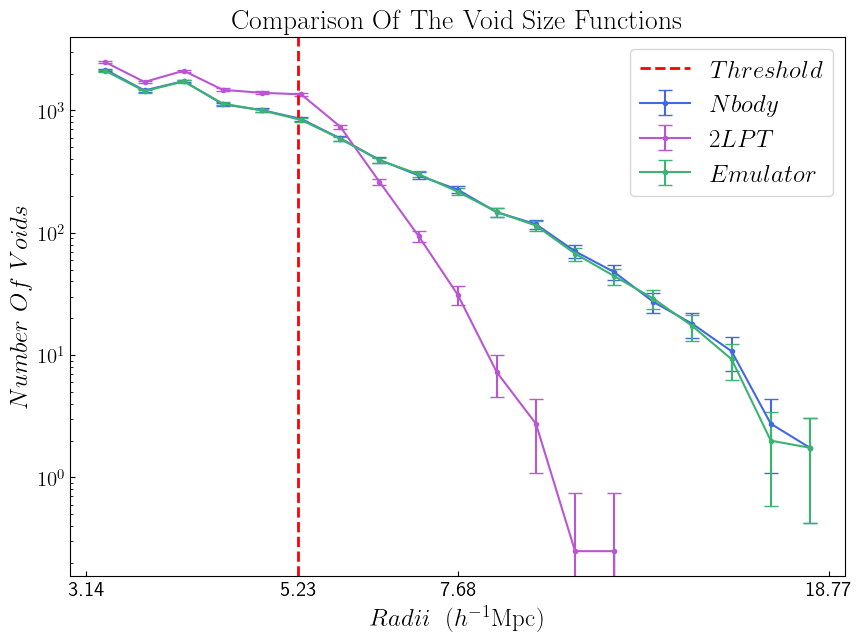

In [ ]:
#compare void size function of 2lpt and nbody
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 7), dpi=100)
bins = np.logspace(np.log10(min), np.log10(r_max), 20)

radii_nbody = np.concatenate([sim[:, 0] for sim in all_nbody_voids_incl_small])
radii_lpt = np.concatenate([sim[:, 0] for sim in all_lpt_voids_incl_small])
radii_emu = np.concatenate([sim[:, 0] for sim in all_emu_voids_incl_small])
#histo nbody
hist_nbody, bin_edges_nbody= np.histogram(radii_nbody, bins=bins)
bin_centers = np.sqrt(bin_edges_nbody[:-1] * bin_edges_nbody[1:])
errors_nbody = np.sqrt(hist_nbody/(n-1))
ax.errorbar(bin_centers, hist_nbody/(n-1), yerr=errors_nbody, fmt='o', color=colors[0], linestyle='-', capsize=5, markersize=3, label='$Nbody$') #avarage
#histo 2lpt
hist_lpt, bin_edges_lpt= np.histogram(radii_lpt, bins=bins)
bin_centers = np.sqrt(bin_edges_lpt[:-1] * bin_edges_lpt[1:])
errors_lpt = np.sqrt(hist_lpt/(n-1))
ax.errorbar(bin_centers, hist_lpt/(n-1), yerr=errors_lpt, fmt='o', color=colors[1], linestyle='-', capsize=5, markersize=3, label='$2LPT$')
#histo emu
hist_emu, bin_edges_emu= np.histogram(radii_emu, bins=bins)
bin_centers = np.sqrt(bin_edges_emu[:-1] * bin_edges_emu[1:])
errors_emu = np.sqrt(hist_emu/(n-1))
ax.errorbar(bin_centers, hist_emu/(n-1), yerr=errors_emu, fmt='o', color=colors[2], linestyle='-', capsize=5, markersize=3, label='$Emulator$')

ax.set_xscale('log')
ax.set_yscale('log')

ax.get_yaxis().set_tick_params(which='both', direction='in', labelsize=15)
ax.get_xaxis().set_tick_params(which='both', direction='in', labelsize=15)

ticks = np.logspace(np.log10(min), np.log10(r_max), 3)
ticks = np.append(ticks, r_min)  
ax.set_xticks(ticks)
ax.set_xticks([], minor=True)  # delete Minor-Ticks, falls nötig
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.2f}".rstrip('0').rstrip('.')))  

ax.axvline(x=r_min, color='red', linestyle='--', linewidth=2, label='$Threshold$')
plt.legend(fontsize = 18)

plt.xlabel('$Radii$  \ $(h^{-1}  \mathrm{Mpc})$', fontsize = 18)
plt.ylabel('$Number \ Of \ Voids$', fontsize = 18)
plt.title('$ \mathrm{Comparison \ Of \ The \ Void \ Size \ Functions} $', fontsize = 20)

/var/folders/ss/qz81s18561g4v9nxv6k7wq_w0000gn/T/ipykernel_51354/2841477322.py:11: RuntimeWarning: divide by zero encountered in divide
  error_ratio_lpt_nbody = ratio_lpt_nbody * np.sqrt((1/(n-1))*(1/hist_lpt + 1/hist_nbody))


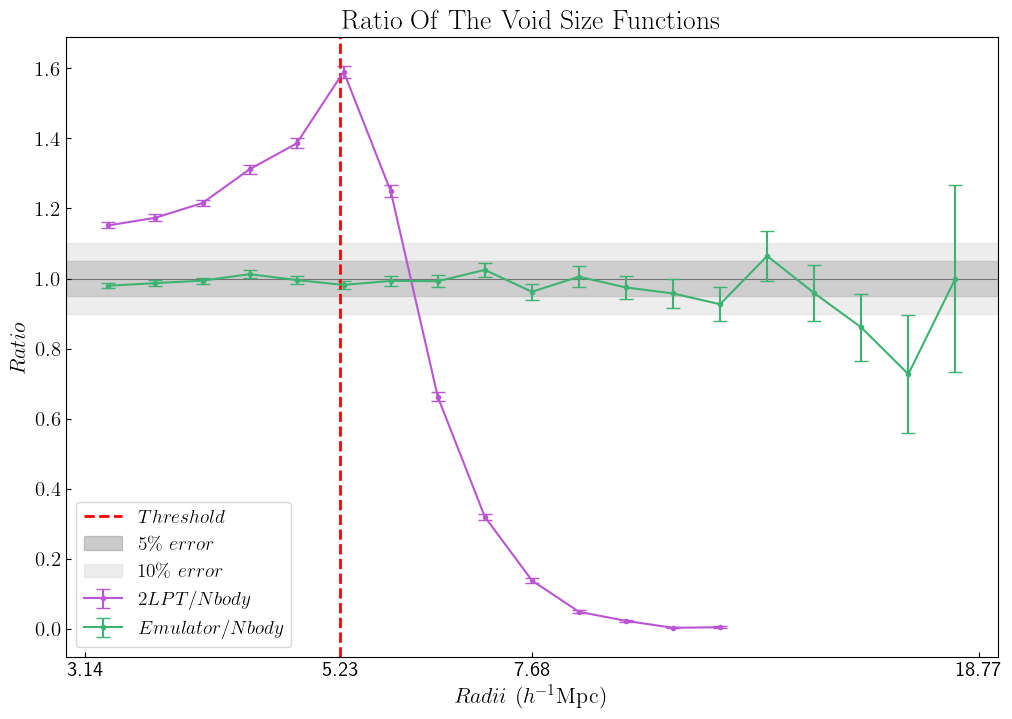

In [ ]:
#vsf ratio
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 7), dpi=100)
#ratio lpt/nbody
ratio_lpt_nbody = np.divide(hist_lpt, hist_nbody, out=np.full_like(hist_lpt, np.nan, dtype=np.float64), where=(hist_lpt > 0) & (hist_nbody > 0))
#ratio emu/nbody
ratio_emu_nbody = np.divide(hist_emu, hist_nbody, out=np.full_like(hist_emu, np.nan, dtype=np.float64), where=(hist_emu > 0) & (hist_nbody > 0))
#gaussian errors
error_ratio_lpt_nbody = ratio_lpt_nbody * np.sqrt((1/(n-1))*(1/hist_lpt + 1/hist_nbody))
error_ratio_emu_nbody = ratio_emu_nbody * np.sqrt((1/(n-1))*(1/hist_emu + 1/hist_nbody))

#plot
ax.errorbar(bin_centers, ratio_lpt_nbody, yerr=error_ratio_lpt_nbody, fmt='o', color=colors[1], linestyle='-', capsize=5, markersize=3, label='$2LPT/Nbody$')
ax.errorbar(bin_centers, ratio_emu_nbody, yerr=error_ratio_emu_nbody, fmt='o', color=colors[2], linestyle='-', capsize=5, markersize=3, label='$Emulator/Nbody$')

ax.axvline(x=r_min, color='red', linestyle='--', linewidth=2, label='$Threshold$')
ax.set_xscale('log')
ax.get_yaxis().set_tick_params(which='both', direction='in', labelsize=15)
ax.get_xaxis().set_tick_params(which='both', direction='in', labelsize=15)
ax.axhline(y=1, color='black', ls='-', zorder=1, lw=0.8)
ax.axhspan(0.95, 1.05, color='grey', alpha=0.4, label='$ 5 \% \ error $')
ax.axhspan(0.9, 1.1, color='lightgrey', alpha=0.4, label='$ 10 \% \ error $')

# Ticks
ticks = np.logspace(np.log10(min), np.log10(r_max), 3)
ticks = np.append(ticks, r_min)
ax.set_xticks(ticks)
ax.set_xticks([], minor=True)
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.2f}".rstrip('0').rstrip('.')))
plt.title('$ \mathrm{Ratio \ Of \ The \ Void \ Size \ Functions} $', fontsize = 20)
plt.tight_layout()
ax.set_xlabel('$Radii$  $(h^{-1}  \mathrm{Mpc})$', fontsize=16)
ax.set_ylabel("$Ratio$", fontsize=16)
ax.legend(fontsize=14)

STD: 0.0002440040525119675
Limits: [5.934, 6.034]


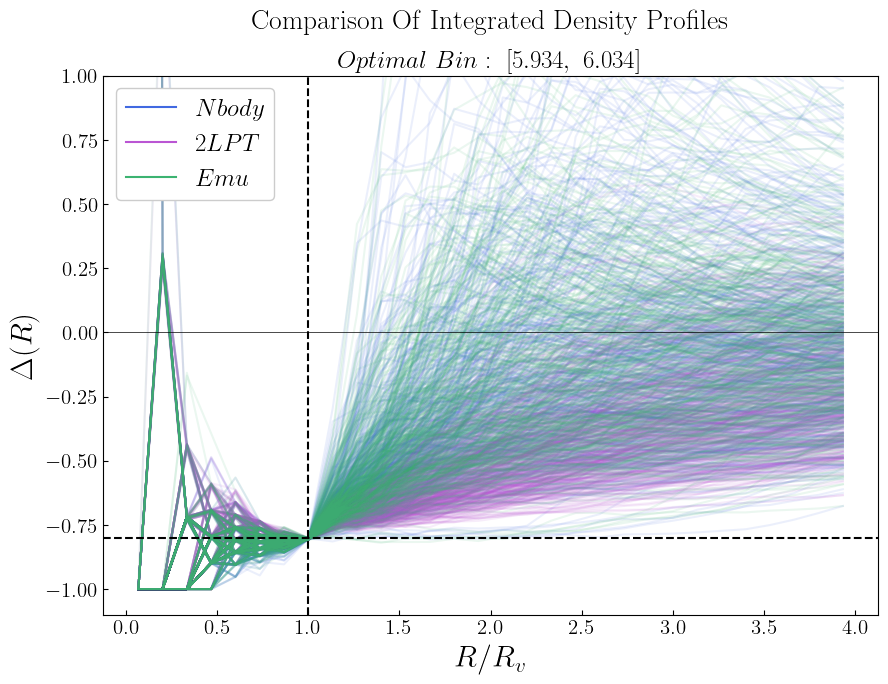

In [ ]:
#compare integrated density profiles
import itertools
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 7), dpi=100)
plt.ylim(-1.1, 1)

def weighted_mean_radius_in_interval(r1, r2, dataset):
    radii = [sim[:, 0] for sim in dataset]  
    filtered_radii = [r[(r >= r1) & (r <= r2)] for r in radii]
    
    weighted_means = [] #weighted with histogram
    for r in filtered_radii:
        if len(r) > 0:
            counts, bin_edges = np.histogram(r, bins=np.linspace(r1, r2, 31))
            bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  
            
            weighted_mean = np.average(bin_centers, weights=counts)
            weighted_means.append(weighted_mean)
    
    if len(weighted_means) > 0:
        return np.mean(weighted_means) 
    else:
        return np.nan 

def weighted_mean_radius_difference(r1, r2, datasets):
    means = []
    for sims in datasets:
        mean = weighted_mean_radius_in_interval(r1, r2, sims)
        if not np.isnan(mean):
            means.append(mean)
    if len(means) == len(datasets):  
        return np.std(means)  
    else:
        return np.inf  

step = 0.1 #to check intervalls
best_std = np.inf
best_bounds = (r_min, r_max)

for r_1, r_2 in itertools.combinations(np.arange(r_min, r_max, step), 2):
    std = weighted_mean_radius_difference(r_1, r_2, [all_nbody_voids, all_lpt_voids, all_emu_voids])
    
    if std < best_std:
        best_std = std
        best_bounds = (r_1, r_2)

print("STD:", best_std)
limits = [round(float(i), 3) for i in best_bounds]
print("Limits:", limits)

r1 = limits[0]
r2 = limits[1]


nbody_profiles_list = []
lpt_profiles_list = []
emu_profiles_list = []
scaled_bins = np.linspace(0, 4, 31)  # 30 bins
scaled_bin_centers = (scaled_bins[:-1] + scaled_bins[1:]) / 2

nbody_delta_profiles_groups, nbody_void_radii_groups = np.load(f"/Users/CHermann/Desktop/MPE/Bachelor_thesis/Nbody_results/Numpy_files/all_integrated_delta_profiles_population_spaced_groups.npy", allow_pickle=True)
lpt_delta_profiles_groups, lpt_void_radii_groups = np.load(f"/Users/CHermann/Desktop/MPE/Bachelor_thesis/2LPT_results/Numpy_files/all_integrated_delta_profiles_population_spaced_groups.npy", allow_pickle=True)
emu_delta_profiles_groups, emu_void_radii_groups = np.load(f"/Users/CHermann/Desktop/MPE/Bachelor_thesis/Emu_results/Numpy_files/all_integrated_delta_profiles_population_spaced_groups.npy", allow_pickle=True)

for group in nbody_delta_profiles_groups:
      for r, delta in zip(nbody_void_radii_groups[group], nbody_delta_profiles_groups[group]):
        if r > r1 and r < r2:
            nbody_profiles_list.append(np.squeeze(delta))
            ax.plot(scaled_bin_centers, np.squeeze(delta), marker='None', alpha=0.1, linestyle='-', color=colors[0])
for group in lpt_delta_profiles_groups:
      for r, delta in zip(lpt_void_radii_groups[group], lpt_delta_profiles_groups[group]):
        if r > r1 and r < r2:
            lpt_profiles_list.append(np.squeeze(delta))
            ax.plot(scaled_bin_centers, np.squeeze(delta), marker='None', alpha=0.1, linestyle='-', color=colors[1])
for group in emu_delta_profiles_groups:
      for r, delta in zip(emu_void_radii_groups[group], emu_delta_profiles_groups[group]):
        if r > r1 and r < r2:
            emu_profiles_list.append(np.squeeze(delta))
            ax.plot(scaled_bin_centers, np.squeeze(delta), marker='None', alpha=0.1, linestyle='-', color=colors[2])
            
ax.get_yaxis().set_tick_params(which='both', direction='in', labelsize=15)
ax.get_xaxis().set_tick_params(which='both', direction='in', labelsize=15)
ax.axhline(y=0, color='k', ls='-', zorder=5, lw=0.5)
ax.axvline(x=1, color='k', ls='--', zorder=5)
ax.axhline(y=-0.8, color='k', ls='--')
ax.text(0.5, 1.1, '$ \mathrm{Comparison \ Of \ Integrated \ Density \ Profiles}$', ha='center', va='center', fontsize=20, transform=ax.transAxes)
ax.set_title(f'$Optimal \ Bin: \ [{r1}, \ {r2}]$', fontsize=18)

plt.xlabel('$R/R_v$', fontsize=22)
plt.ylabel('$\Delta(R)$', fontsize=22)

legend_handles = [ax.plot([], [], color=colors[0], linestyle='-', label='$Nbody$', alpha=1)[0], ax.plot([], [], color=colors[1], linestyle='-', label='$2LPT$', alpha=1)[0],ax.plot([], [], color=colors[2], linestyle='-', label='$Emu$', alpha=1)[0]]
ax.legend(handles=legend_handles, fontsize=18, framealpha=1)

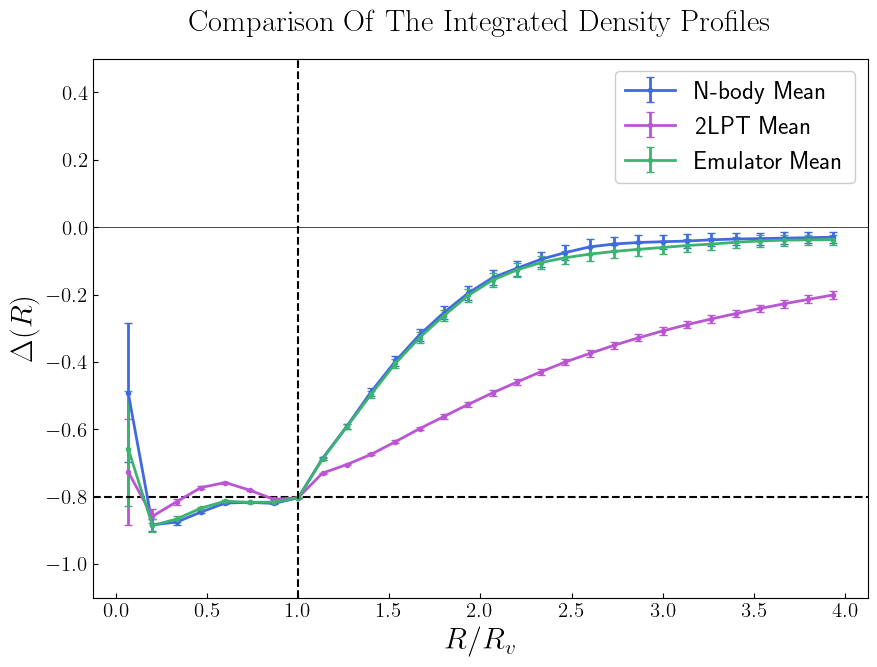

In [137]:
#means
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 7), dpi=100)
plt.ylim(-1.1, 0.5)

nbody_mean_profile = np.mean(nbody_profiles_list, axis=0)
lpt_mean_profile = np.mean(lpt_profiles_list, axis=0)
emu_mean_profile = np.mean(emu_profiles_list, axis=0)
nbody_std_delta_profile = np.std(nbody_profiles_list, axis=0) / np.sqrt(len(nbody_profiles_list))
lpt_std_delta_profile = np.std(lpt_profiles_list, axis=0) / np.sqrt(len(lpt_profiles_list))
emu_std_delta_profile = np.std(emu_profiles_list, axis=0) / np.sqrt(len(emu_profiles_list))

ax.errorbar(scaled_bin_centers, nbody_mean_profile, yerr=nbody_std_delta_profile, fmt = 'o', linestyle='-', color=colors[0], linewidth=2, capsize= 3, markersize =3, label="N-body Mean")
ax.errorbar(scaled_bin_centers, lpt_mean_profile, yerr=lpt_std_delta_profile, fmt = 'o', linestyle='-', color=colors[1], linewidth=2, capsize= 3, markersize =3, label="2LPT Mean")
ax.errorbar(scaled_bin_centers, emu_mean_profile, yerr=emu_std_delta_profile, fmt = 'o', linestyle='-', color=colors[2], linewidth=2, capsize= 3, markersize =3, label="Emulator Mean")

ax.get_yaxis().set_tick_params(which='both', direction='in', labelsize=15)
ax.get_xaxis().set_tick_params(which='both', direction='in', labelsize=15)
ax.axhline(y=0, color='k', ls='-', zorder=5, lw=0.5)
ax.axvline(x=1, color='k', ls='--', zorder=5)
ax.axhline(y=-0.8, color='k', ls='--')

plt.title('$ \mathrm{Comparison \ Of \ The \ Integrated \ Density \ Profiles} $', fontsize=22, pad=20)
plt.xlabel('$R/R_v$', fontsize=22)
plt.ylabel('$\Delta(R)$', fontsize=22)

# Legende aktualisieren
ax.legend(fontsize=18, framealpha=1)

In [ ]:
#delta ratoo
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 7), dpi=100)
#ratio lpt/nbody
ratio_lpt_nbody_delta = np.divide(lpt_mean_profile, nbody_mean_profile, out=np.full_like(lpt_mean_profile, np.nan, dtype=np.float64), where=(lpt_mean_profile > 0) & (nbody_mean_profile > 0))
#ratio emu/nbody
ratio_emu_nbody_delta = np.divide(emu_mean_profile, nbody_mean_profile, out=np.full_like(emu_mean_profile, np.nan, dtype=np.float64), where=(emu_mean_profile > 0) & (nbody_mean_profile > 0))
#gaussian errors
error_delta_lpt_nbody = ratio_lpt_nbody_delta * np.sqrt((lpt_std_delta_profile/lpt_mean_profile)**2 + (nbody_std_delta_profile/nbody_mean_profile)**2)
error_delta_emu_nbody = ratio_emu_nbody_delta * np.sqrt((emu_std_delta_profile/emu_mean_profile)**2 + (nbody_std_delta_profile/nbody_mean_profile)**2)

#plot
ax.errorbar(scaled_bin_centers, ratio_lpt_nbody_delta, yerr=error_delta_lpt_nbody, fmt='o', color=colors[1], linestyle='-', capsize=5, markersize=3, label='$2LPT/Nbody$')
ax.errorbar(scaled_bin_centers, ratio_emu_nbody_delta, yerr=error_delta_emu_nbody, fmt='o', color=colors[2], linestyle='-', capsize=5, markersize=3, label='$Emulator/Nbody$')

ax.get_yaxis().set_tick_params(which='both', direction='in', labelsize=15)
ax.get_xaxis().set_tick_params(which='both', direction='in', labelsize=15)
ax.axhline(y=1, color='black', ls='-', zorder=1, lw=0.8)
ax.axhspan(0.95, 1.05, color='grey', alpha=0.4, label='$ 5 \% \ error $')
ax.axhspan(0.9, 1.1, color='lightgrey', alpha=0.4, label='$ 10 \% \ error $')

plt.title('$ \mathrm{Ratio \ Of \ The \ Density \ Profiles} $', fontsize = 20)
plt.tight_layout()
ax.set_xlabel('$$R/R_v$$', fontsize=18)
ax.set_ylabel('$\Delta(R)$', fontsize=18)
ax.legend(fontsize=18)

In [ ]:
#compare velocity profiles

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 7), dpi=100)

nbody_velo_profiles_list = []
lpt_velo_profiles_list = []
emu_velo_profiles_list = []
scaled_bins = np.linspace(0, 10, 31)  # 30 bins
scaled_bin_centers = (scaled_bins[:-1] + scaled_bins[1:]) / 2

nbody_velocity_profiles_groups, nbody_void_radii_groups = np.load(f"/Users/CHermann/Desktop/MPE/Bachelor_thesis/Nbody_results/Numpy_files/all_velocity_profiles_equipopulated_groups.npy", allow_pickle=True)
lpt_velocity_profiles_groups, lpt_void_radii_groups = np.load(f"/Users/CHermann/Desktop/MPE/Bachelor_thesis/2LPT_results/Numpy_files/all_velocity_profiles_equipopulated_groups.npy", allow_pickle=True)
emu_velocity_profiles_groups, emu_void_radii_groups = np.load(f"/Users/CHermann/Desktop/MPE/Bachelor_thesis/Emu_results/Numpy_files/all_velocity_profiles_equipopulated_groups.npy", allow_pickle=True)

for group in nbody_velocity_profiles_groups:
      for r, velo in zip(nbody_void_radii_groups[group], nbody_velocity_profiles_groups[group]):
        if r > r1 and r < r2:
            nbody_velo_profiles_list.append(np.squeeze(velo))
            ax.plot(scaled_bin_centers, np.squeeze(velo), marker='None', alpha=0.1, linestyle='-', color=colors[0])
for group in lpt_velocity_profiles_groups:
      for r, velo in zip(lpt_void_radii_groups[group], lpt_velocity_profiles_groups[group]):
        if r > r1 and r < r2:
            lpt_velo_profiles_list.append(np.squeeze(velo))
            ax.plot(scaled_bin_centers, np.squeeze(velo), marker='None', alpha=0.1, linestyle='-', color=colors[1])
for group in emu_velocity_profiles_groups:
      for r, velo in zip(emu_void_radii_groups[group], emu_velocity_profiles_groups[group]):
        if r > r1 and r < r2:
            emu_velo_profiles_list.append(np.squeeze(velo))
            ax.plot(scaled_bin_centers, np.squeeze(velo), marker='None', alpha=0.1, linestyle='-', color=colors[2])
            
ax.get_yaxis().set_tick_params(which='both', direction='in', labelsize=15)
ax.get_xaxis().set_tick_params(which='both', direction='in', labelsize=15)
ax.axhline(y=0, color='k', ls='-', zorder=5, lw=0.5)
ax.axvline(x=1, color='k', ls='--', zorder=5)
ax.axhline(y=-0.8, color='k', ls='--')
ax.text(0.5, 1.1, '$ \mathrm{Comparison \ Of \ Velocity \ Profiles}$', ha='center', va='center', fontsize=20, transform=ax.transAxes)
ax.set_title(f'$Optimal \ Bin: \ [{r1}, \ {r2}]$', fontsize=18)

plt.xlabel('$R/R_v$', fontsize=22)
plt.ylabel('$\Delta(R)$', fontsize=22)

legend_handles = [ax.plot([], [], color=colors[0], linestyle='-', label='$Nbody$', alpha=1)[0], ax.plot([], [], color=colors[1], linestyle='-', label='$2LPT$', alpha=1)[0],ax.plot([], [], color=colors[2], linestyle='-', label='$Emu$', alpha=1)[0]]
ax.legend(handles=legend_handles, fontsize=18, framealpha=1)

In [ ]:
#means
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 7), dpi=100)
plt.ylim(-1.1, 0.5)

nbody_velo_mean_profile = np.mean(nbody_velo_profiles_list, axis=0)
lpt_velo_mean_profile = np.mean(lpt_velo_profiles_list, axis=0)
emu_velo_mean_profile = np.mean(emu_velo_profiles_list, axis=0)
nbody_std_velo_profile = np.std(nbody_velo_profiles_list, axis=0) / np.sqrt(len(nbody_velo_profiles_list))
lpt_std_velo_profile = np.std(lpt_velo_profiles_list, axis=0) / np.sqrt(len(lpt_velo_profiles_list))
emu_std_velo_profile = np.std(emu_velo_profiles_list, axis=0) / np.sqrt(len(emu_velo_profiles_list))

ax.errorbar(scaled_bin_centers, nbody_velo_mean_profile, yerr=nbody_std_velo_profile, fmt = 'o', linestyle='-', color=colors[0], linewidth=2, capsize= 3, markersize =3, label="N-body Mean")
ax.errorbar(scaled_bin_centers, lpt_velo_mean_profile, yerr=lpt_std_velo_profile, fmt = 'o', linestyle='-', color=colors[1], linewidth=2, capsize= 3, markersize =3, label="2LPT Mean")
ax.errorbar(scaled_bin_centers, emu_velo_mean_profile, yerr=emu_std_velo_profile, fmt = 'o', linestyle='-', color=colors[2], linewidth=2, capsize= 3, markersize =3, label="Emulator Mean")

ax.get_yaxis().set_tick_params(which='both', direction='in', labelsize=15)
ax.get_xaxis().set_tick_params(which='both', direction='in', labelsize=15)
ax.axhline(y=0, color='k', ls='-', zorder=5, lw=0.5)
ax.axvline(x=1, color='k', ls='--', zorder=5)
ax.axhline(y=-0.8, color='k', ls='--')

plt.title('$ \mathrm{Comparison \ Of \ The \ Velocity \ Profiles} $', fontsize=22, pad=20)
plt.xlabel('$R/R_v$', fontsize=22)
plt.ylabel('$\Delta(R)$', fontsize=22)

# Legende aktualisieren
ax.legend(fontsize=18, framealpha=1)

/var/folders/ss/qz81s18561g4v9nxv6k7wq_w0000gn/T/ipykernel_51354/2841477322.py:11: RuntimeWarning: divide by zero encountered in divide
  error_ratio_lpt_nbody = ratio_lpt_nbody * np.sqrt((1/(n-1))*(1/hist_lpt + 1/hist_nbody))


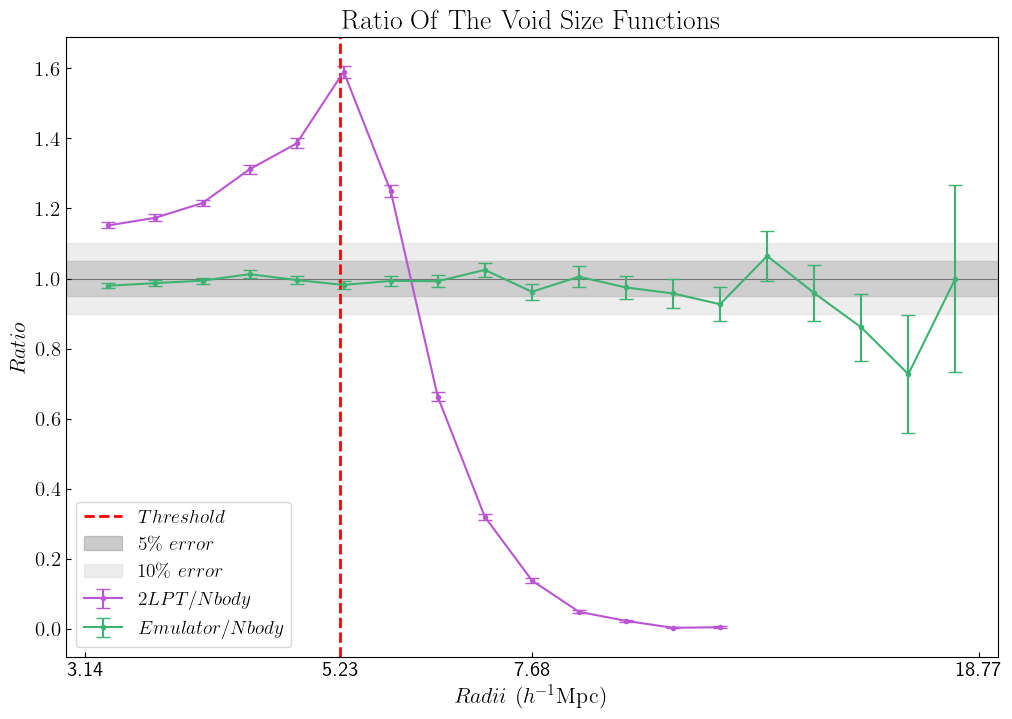

In [ ]:
#velocity ratio
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 7), dpi=100)
#ratio lpt/nbody
ratio_lpt_nbody_velo = np.divide(lpt_velo_mean_profile, nbody_velo_mean_profile, out=np.full_like(lpt_velo_mean_profile, np.nan, dtype=np.float64), where=(lpt_velo_mean_profile > 0) & (nbody_velo_mean_profile > 0))
#ratio emu/nbody
ratio_emu_nbody_velo = np.divide(emu_velo_mean_profile, nbody_velo_mean_profile, out=np.full_like(emu_velo_mean_profile, np.nan, dtype=np.float64), where=(emu_velo_mean_profile > 0) & (nbody_velo_mean_profile > 0))
#gaussian errors
error_velo_lpt_nbody = ratio_lpt_nbody_velo * np.sqrt((lpt_velo_std_velo_profile/lpt_mean_profile)**2 + (nbody_std_delta_profile/nbody_mean_profile)**2)
error_velo_emu_nbody = ratio_emu_nbody_velo * np.sqrt((emu_velo_std_profile/emu_mean_profile)**2 + (nbody_std_delta_profile/nbody_mean_profile)**2)

#plot
ax.errorbar(scaled_bin_centers, ratio_lpt_nbody_delta, yerr=error_delta_lpt_nbody, fmt='o', color=colors[1], linestyle='-', capsize=5, markersize=3, label='$2LPT/Nbody$')
ax.errorbar(scaled_bin_centers, ratio_emu_nbody_delta, yerr=error_delta_emu_nbody, fmt='o', color=colors[2], linestyle='-', capsize=5, markersize=3, label='$Emulator/Nbody$')

ax.get_yaxis().set_tick_params(which='both', direction='in', labelsize=15)
ax.get_xaxis().set_tick_params(which='both', direction='in', labelsize=15)
ax.axhline(y=1, color='black', ls='-', zorder=1, lw=0.8)
ax.axhspan(0.95, 1.05, color='grey', alpha=0.4, label='$ 5 \% \ error $')
ax.axhspan(0.9, 1.1, color='lightgrey', alpha=0.4, label='$ 10 \% \ error $')

plt.title('$ \mathrm{Ratio \ Of \ The \ Density \ Profiles} $', fontsize = 20)
plt.tight_layout()
ax.set_xlabel('$$R/R_v$$', fontsize=18)
ax.set_ylabel('$\Delta(R)$', fontsize=18)
ax.legend(fontsize=18)